<a href="https://colab.research.google.com/github/zeynepsoyan/ai-bootcamp-fashion/blob/main/Fashion_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kıyafet Sınıflandırma Projesi

In [204]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

## 1. Veri Seti Seçimi

Kullanım kolaylığı açısından Bootcamp dokumanında da önerildiği üzere Keras kütüphanesinde hazır olarak bulunan "Fashion MNIST" veriseti kullanılmıştır.

In [205]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [206]:
# Verisetindeki sınıf isimleri
# https://keras.io/api/datasets/fashion_mnist/

# Görselleştirme sırasında verinin daha anlamlı görüntülenebilmesi için isimlendirme yapıldı.

class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

print("Fashion MNIST class labels:\n")
for i, label in enumerate(class_labels):
    print(f"{i}: {label}")

Fashion MNIST class labels:

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


## 2. Veri Ön İşleme

Kullanım kolaylığı açısından Bootcamp dokumanında da önerildiği üzere Keras kütüphanesinde hazır olarak bulunan "Fashion MNIST" veriseti kullanılmıştır.

In [207]:
# Modelin öğrenebilmesi için veriyi eğitim ve test olarak ayırdım, burada x veriyi, y ise verinin etiketini / sınıfını temsil eder.

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [208]:
x_train.shape

(60000, 28, 28)

In [209]:
y_train.shape

(60000,)

In [210]:
x_test.shape

(10000, 28, 28)

In [211]:
y_test.shape

(10000,)

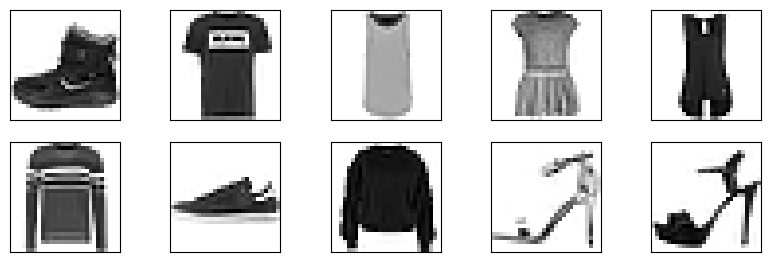

In [212]:
# Verisetindeki rastgele 10 görüntünün görselleştirilmesi

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [213]:
# Veriyi 0-1 arasında olacak şekilde normalize ettim
# 255'e bölmemizin nedeni renk değerinin en fazla 255 değerini alması.
# Piksel değerlerini daha küçük bir aralığa indirerek modelin daha hızlı ve daha iyi öğrenmesine yardımcı oluruz.

x_train = x_train / 255.0
x_test = x_test / 255.0

## 3. Model Oluşturulması ve  Eğitilmesi

### 3.1. Machine Learning Yöntemleri ile
1.   KNN
2.   Random Forest
3.   Decision Tree
4.   SVC

**Not:** Gradient Boosting modeli ile de eğitmeye çalıştım fakat modelin eğitilmesi uzun sürüyordu, süre kısıtından dolayı devam etmedim.

In [214]:
# Farklı modellerin performanslarını birbirleriyle daha kolay karşılaştırabilmek için ortak bir dictionary yapısında toplarız.
# Skorları eklerken 4. ondalığa yuvarlayıp ekleriz, okuması ve karşılaştırması daha kolay olması açısından. Ör: 0.2222

scores = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [215]:
# Görsel verileri 28x28 görüntü formatından 1x784 boyutlu tek boyutlu vektörlere düzleştirelim

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

#### 3.1.1. K-Nearest Neighbours Algoritması

Yeni bir veri noktasını sınıflandırmak için en yakın K noktayı kullanan bir algoritma.

In [216]:
knn = KNeighborsClassifier().fit(x_train,y_train)

In [217]:
y_pred = knn.predict(x_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
precision = precision_score(y_test,y_pred, average='weighted')

scores["Algorithm"].append("KNN")
scores["Accuracy"].append(round(acc, 4))
scores["F1 Score"].append(round(f1, 4))
scores["Recall"].append(round(recall, 4))
scores["Precision"].append(round(precision, 4))

scores

{'Algorithm': ['KNN'],
 'Accuracy': [0.8554],
 'Precision': [0.8578],
 'Recall': [0.8554],
 'F1 Score': [0.8546]}

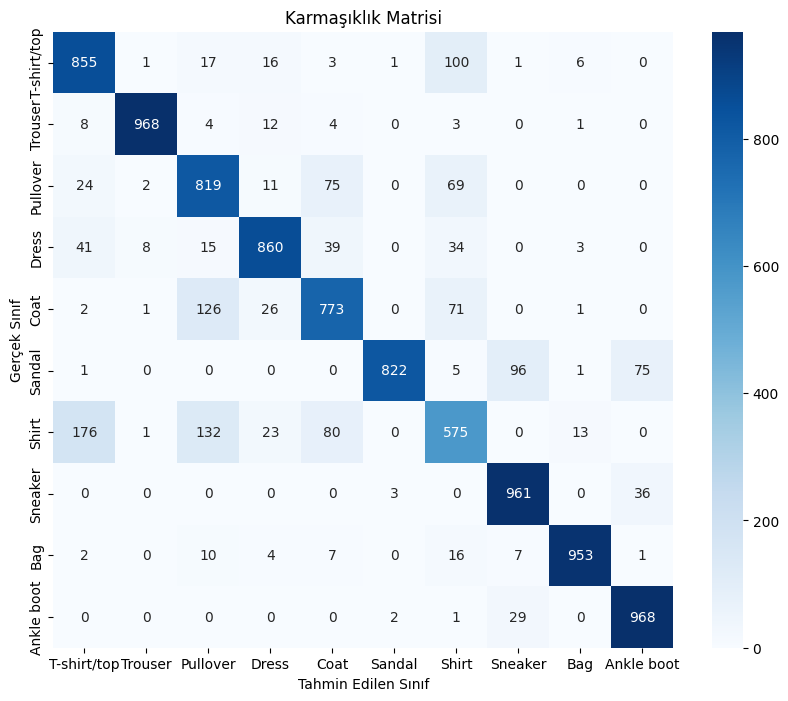

In [218]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)

# Görselleştirme

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

#### 3.1.2. Random Forest Algoritması

Birden fazla karar ağacını eğiterek ve her bir ağacın tahminlerini birleştirerek sınıflandırma yapar

In [219]:
rf = RandomForestClassifier().fit(x_train,y_train)

In [220]:
y_pred = rf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
precision = precision_score(y_test,y_pred, average='weighted')

scores["Algorithm"].append("Random Forest")
scores["Accuracy"].append(round(acc, 4))
scores["F1 Score"].append(round(f1, 4))
scores["Recall"].append(round(recall, 4))
scores["Precision"].append(round(precision, 4))

scores

{'Algorithm': ['KNN', 'Random Forest'],
 'Accuracy': [0.8554, 0.8756],
 'Precision': [0.8578, 0.8747],
 'Recall': [0.8554, 0.8756],
 'F1 Score': [0.8546, 0.8742]}

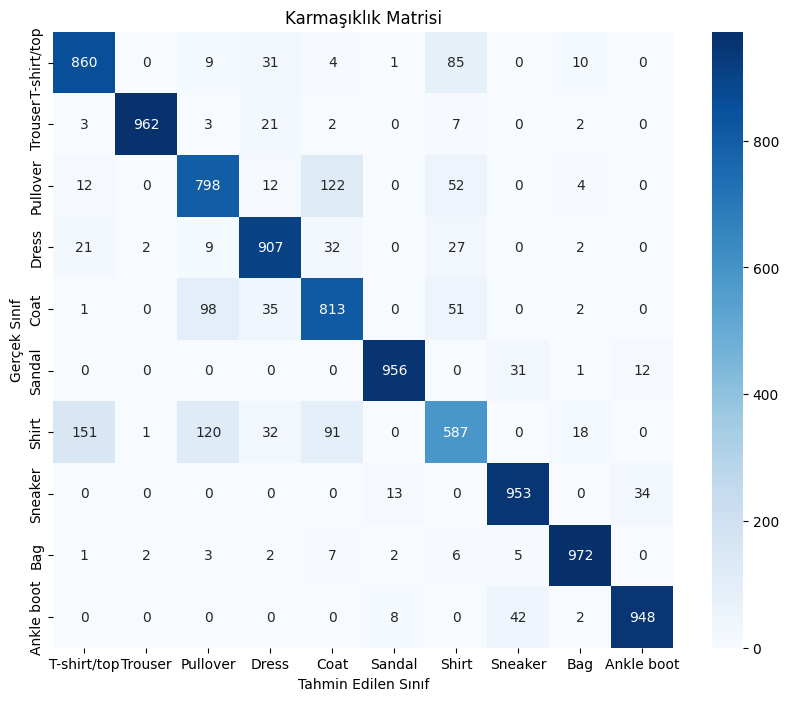

In [221]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)

# Görselleştirme

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

#### 3.1.3. Karar Ağacı Algoritması

Karar Ağacı, veri setini sınıflandırmak için bir ağaç yapısı kullanır. Her bir iç "node", bir özellik ve bir eşik değerine göre veri noktalarını böler.

In [222]:
dt = DecisionTreeClassifier().fit(x_train,y_train)

In [223]:
y_pred = dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
precision = precision_score(y_test,y_pred, average='weighted')

scores["Algorithm"].append("Decision Tree")
scores["Accuracy"].append(round(acc, 4))
scores["F1 Score"].append(round(f1, 4))
scores["Recall"].append(round(recall, 4))
scores["Precision"].append(round(precision, 4))

scores

{'Algorithm': ['KNN', 'Random Forest', 'Decision Tree'],
 'Accuracy': [0.8554, 0.8756, 0.7939],
 'Precision': [0.8578, 0.8747, 0.7946],
 'Recall': [0.8554, 0.8756, 0.7939],
 'F1 Score': [0.8546, 0.8742, 0.7941]}

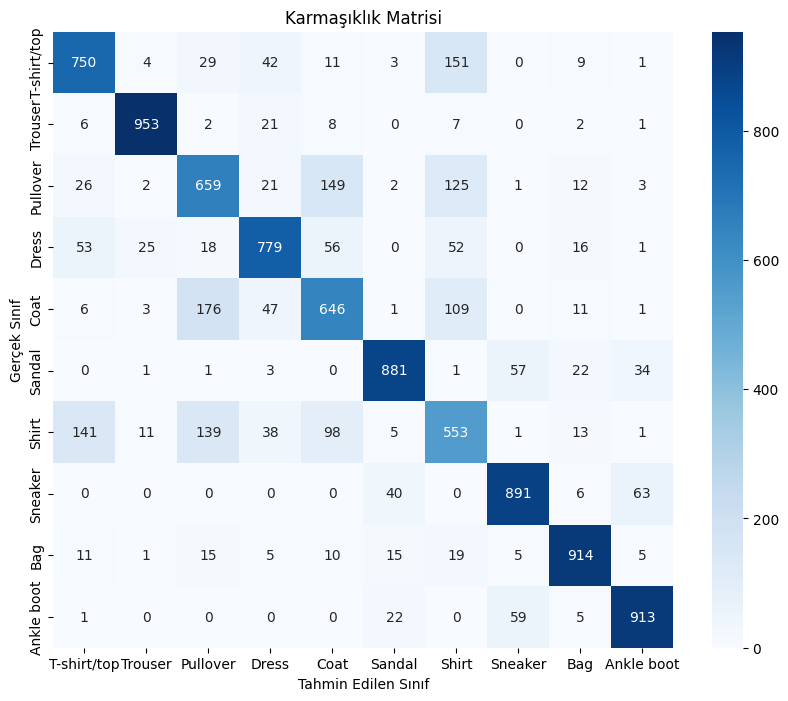

In [224]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)

# Görselleştirme

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

#### 3.1.4. SVC Algoritması

SVC modeli, veri noktalarını sınıflandırmak için en uygun hiper düzlemi bulmaya çalışır.

In [225]:
svc = SVC().fit(x_train,y_train)

In [226]:
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
precision = precision_score(y_test,y_pred, average='weighted')

scores["Algorithm"].append("SVC")
scores["Accuracy"].append(round(acc, 4))
scores["F1 Score"].append(round(f1, 4))
scores["Recall"].append(round(recall, 4))
scores["Precision"].append(round(precision, 4))

scores

{'Algorithm': ['KNN', 'Random Forest', 'Decision Tree', 'SVC'],
 'Accuracy': [0.8554, 0.8756, 0.7939, 0.8828],
 'Precision': [0.8578, 0.8747, 0.7946, 0.8823],
 'Recall': [0.8554, 0.8756, 0.7939, 0.8828],
 'F1 Score': [0.8546, 0.8742, 0.7941, 0.8823]}

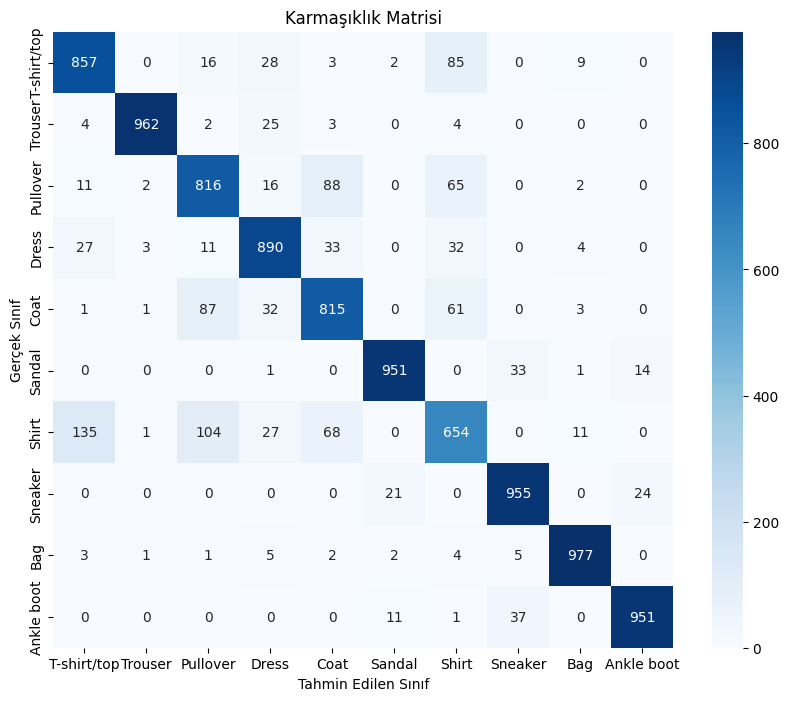

In [227]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)

# Görselleştirme

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

### 3.2. Deep Learning Yöntemi - Yapay Sinir Ağları (ANN) ile


In [228]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [229]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [230]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### 3.2.1. ANN - Trial Parameters

*   2 katman
*   Sırasıyla 4 ve 8 sayılarında nöronlar
*   Epoch = 10

In [231]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_53 (Dense)            (None, 4)                 3140      
                                                                 
 dense_54 (Dense)            (None, 8)                 40        
                                                                 
 dense_55 (Dense)            (None, 10)                90        
                                                                 
Total params: 3270 (12.77 KB)
Trainable params: 3270 (12.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [232]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall"),tf.keras.metrics.F1Score(name="f1_score")])

In [233]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.9124 - accuracy: 0.6738 - precision: 0.8587 - recall: 0.5269 - f1_score: 0.6634 - val_loss: 0.6476 - val_accuracy: 0.7707 - val_precision: 0.8528 - val_recall: 0.6804 - val_f1_score: 0.7660
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5903 - accuracy: 0.7947 - precision: 0.8611 - recall: 0.7189 - f1_score: 0.7913 - val_loss: 0.5929 - val_accuracy: 0.7911 - val_precision: 0.8533 - val_recall: 0.7231 - val_f1_score: 0.7879
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5493 - accuracy: 0.8096 - precision: 0.8623 - recall: 0.7466 - f1_score: 0.8079 - val_loss: 0.5806 - val_accuracy: 0.7984 - val_precision: 0.8451 - val_recall: 0.7422 - val_f1_score: 0.7938
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5274 - accuracy: 0.8184 - precision: 0.8646 - recall: 0.7629 - f1_score: 0.8172 - val_loss: 0.5851 - val_accuracy: 0.7

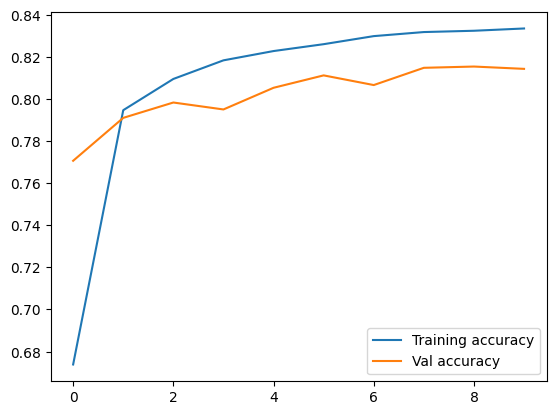

In [234]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Training accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

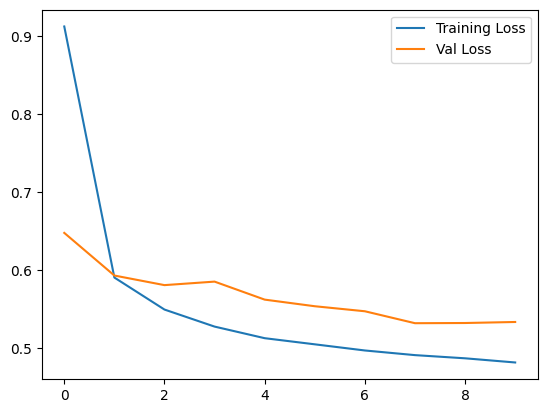

In [235]:
plt.figure()
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

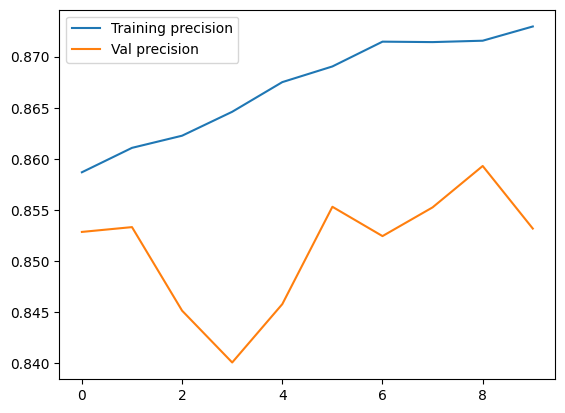

In [236]:
plt.figure()
plt.plot(hist.history["precision"], label="Training precision")
plt.plot(hist.history["val_precision"], label="Val precision")
plt.legend()
plt.show()

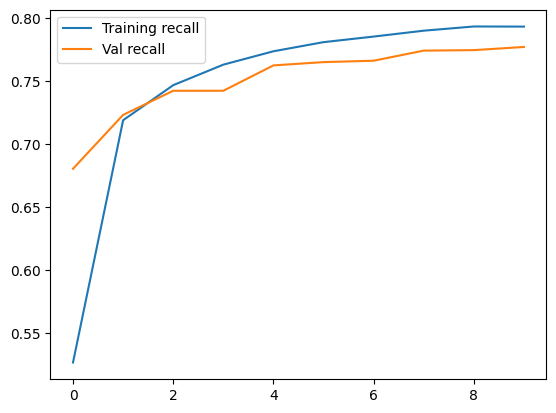

In [237]:
plt.plot(hist.history["recall"], label="Training recall")
plt.plot(hist.history["val_recall"], label="Val recall")
plt.legend()
plt.show()

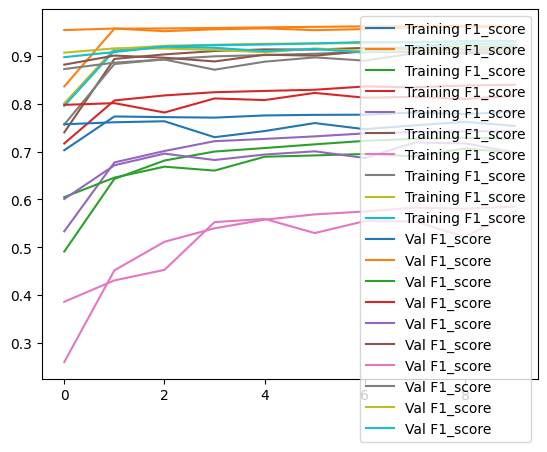

In [238]:
plt.plot(hist.history["f1_score"], label="Training F1_score")
plt.plot(hist.history["val_f1_score"], label="Val F1_score")
plt.legend()
plt.show()

In [239]:
# Son epoch'tan performans metriklerini alalım, burada f1 score bütün sınıflar için ayrı ayrı hesaplandığından ortalamasını alıyoruz.

hist.history["accuracy"][-1], hist.history["precision"][-1], hist.history["recall"][-1], np.mean(hist.history["f1_score"][-1])

(0.8335999846458435, 0.8729521036148071, 0.7930333614349365, 0.83297694)

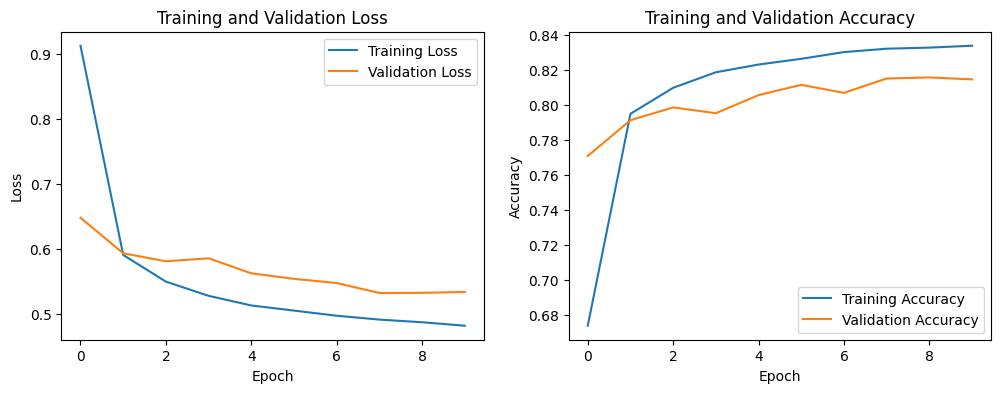

In [240]:
# Overfitting görüntüleme

# Eğitim ve doğrulama metrikleri
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

#### 3.2.2. ANN - Trial Parameters

*   2 katman
*   Sırasıyla 64 ve 32 sayılarında nöronlar
*   Epoch = 20

Overfitting gözlemlemediğimiz önceki denemedeki perfomans metrik değerlerini artırmak için daha fazla nöron ekleyelim ve modeli daha fazla epoch ile çalıştıralım.

In [241]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall"),tf.keras.metrics.F1Score(name="f1_score")])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)
print()
hist.history["accuracy"][-1], hist.history["precision"][-1], hist.history["recall"][-1], np.mean(hist.history["f1_score"][-1])

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5210 - accuracy: 0.8149 - precision: 0.8687 - recall: 0.7563 - f1_score: 0.8126 - val_loss: 0.4265 - val_accuracy: 0.8476 - val_precision: 0.8788 - val_recall: 0.8180 - val_f1_score: 0.8458
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3851 - accuracy: 0.8611 - precision: 0.8899 - recall: 0.8322 - f1_score: 0.8602 - val_loss: 0.3829 - val_accuracy: 0.8597 - val_precision: 0.8906 - val_recall: 0.8312 - val_f1_score: 0.8606
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3492 - accuracy: 0.8736 - precision: 0.8992 - recall: 0.8491 - f1_score: 0.8730 - val_loss: 0.3722 - val_accuracy: 0.8663 - val_precision: 0.8961 - val_recall: 0.8348 - val_f1_score: 0.8666
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3262 - accuracy: 0.8798 - precision: 0.9035 - recall: 0.8583 - f1_score: 0.8792 - val_loss: 0.3736 - val_accuracy: 0.

(0.9226166605949402, 0.9327099919319153, 0.9127500057220459, 0.92235196)

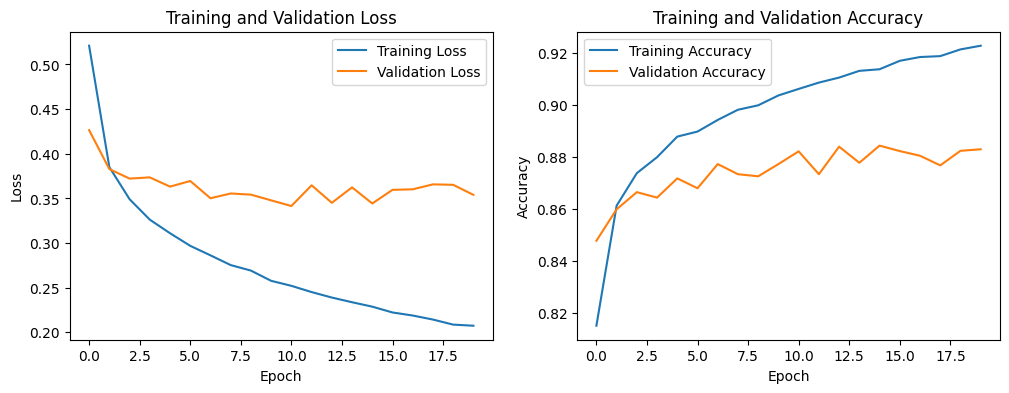

In [242]:
# Overfitting görüntüleme

# Eğitim ve doğrulama metrikleri
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

**Overfitting**


Tanımına göre:

* Loss grafiğinde Training Loss, Validation Loss değerinden belirgin şekilde düşükse,
* Accuracy grafiğinde Training Accuracy, Validation Accuracy değerinden çok daha yüksekse ve Validation Accuracy belirli bir noktadan sonra iyileşmiyorsa veya düşmeye başlarsa,

overfitting göstergesi olabilir.

Yukarıdaki grafiklerde ikisi de görülmekte. Dolayısıyla burada overfitting var diyebiliriz.

#### 3.2.3. ANN - Trial Parameters
*Overfitting düzeltme*

*   2 katman
*   Sırasıyla 64 ve 32 sayılarında nöronlar
*   *Dropout = 0.3 değerini ekleyelim*
*   Epoch = 20

Dropout, her eğitim adımında rastgele nöronları devre dışı bırakarak modelin aşırı uyum sağlamasını (overfitting) önler

In [243]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall"),tf.keras.metrics.F1Score(name="f1_score")])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)
print()
hist.history["accuracy"][-1], hist.history["precision"][-1], hist.history["recall"][-1], np.mean(hist.history["f1_score"][-1])

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.7588 - accuracy: 0.7320 - precision: 0.8420 - recall: 0.6164 - f1_score: 0.7282 - val_loss: 0.4628 - val_accuracy: 0.8337 - val_precision: 0.8844 - val_recall: 0.7793 - val_f1_score: 0.8303
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5386 - accuracy: 0.8098 - precision: 0.8701 - recall: 0.7426 - f1_score: 0.8082 - val_loss: 0.4276 - val_accuracy: 0.8453 - val_precision: 0.8930 - val_recall: 0.7959 - val_f1_score: 0.8439
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4913 - accuracy: 0.8273 - precision: 0.8805 - recall: 0.7714 - f1_score: 0.8258 - val_loss: 0.4072 - val_accuracy: 0.8534 - val_precision: 0.9029 - val_recall: 0.8050 - val_f1_score: 0.8526
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4665 - accuracy: 0.8345 - precision: 0.8840 - recall: 0.7832 - f1_score: 0.8330 - val_loss: 0.3990 - val_accuracy: 0.

(0.8665666580200195, 0.9016056060791016, 0.83201664686203, 0.8658966)

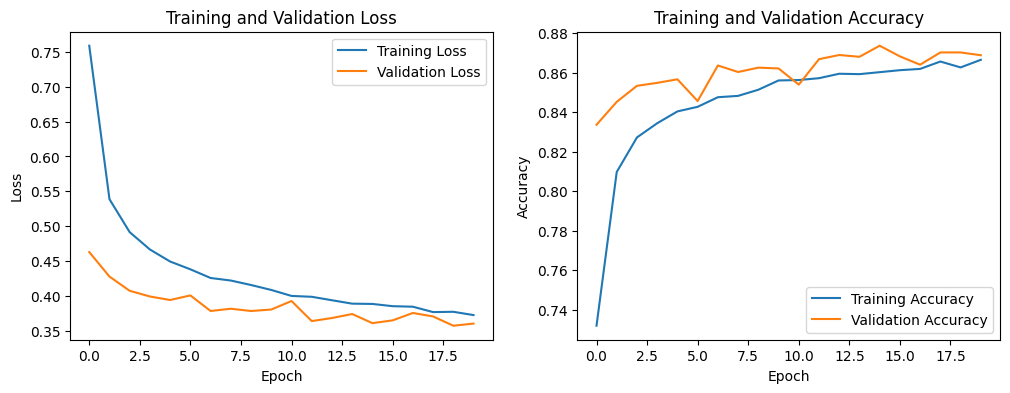

In [244]:
# Overfitting görüntüleme

# Eğitim ve doğrulama metrikleri
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

#### 3.2.4. ANN - Trial Parameters
*Overfitting düzeltme ile*

*   3 katman
*   Sırasıyla 128, 64 ve 32 sayılarında nöronlar
*   *Dropout = 0.3 değerini ekleyelim*
*   Epoch = 20

Overfitting sorununu önceki denemede düzelttiğimize göre 128 nöronluk bir katman ekleyerek performans metriklerini artırma çalışmalarına devam edebiliriz.

In [245]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall"),tf.keras.metrics.F1Score(name="f1_score")])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6535 - accuracy: 0.7646 - precision: 0.8525 - recall: 0.6784 - f1_score: 0.7608 - val_loss: 0.4515 - val_accuracy: 0.8401 - val_precision: 0.8846 - val_recall: 0.7923 - val_f1_score: 0.8376
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4672 - accuracy: 0.8332 - precision: 0.8787 - recall: 0.7839 - f1_score: 0.8313 - val_loss: 0.4157 - val_accuracy: 0.8491 - val_precision: 0.8867 - val_recall: 0.8091 - val_f1_score: 0.8469
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4332 - accuracy: 0.8453 - precision: 0.8850 - recall: 0.8031 - f1_score: 0.8439 - val_loss: 0.4131 - val_accuracy: 0.8525 - val_precision: 0.8851 - val_recall: 0.8115 - val_f1_score: 0.8523
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4058 - accuracy: 0.8538 - precision: 0.8895 - recall: 0.8172 - f1_score: 0.8526 - val_loss: 0.3888 - val_accuracy: 

In [246]:
acc = round(hist.history["accuracy"][-1], 4)
precision = round(hist.history["precision"][-1], 4)
recall = round(hist.history["recall"][-1], 4)
f1_score = round(np.mean(hist.history["f1_score"][-1]), 4)

print(f"Performance Metrics -> Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")

Performance Metrics -> Accuracy: 0.8883, Precision: 0.9087, Recall: 0.87, F1 Score: 0.8877000212669373


In [247]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall"),tf.keras.metrics.F1Score(name="f1_score")])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6608 - accuracy: 0.7619 - precision: 0.8490 - recall: 0.6720 - f1_score: 0.7567 - val_loss: 0.4543 - val_accuracy: 0.8351 - val_precision: 0.8829 - val_recall: 0.7907 - val_f1_score: 0.8297
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4780 - accuracy: 0.8305 - precision: 0.8778 - recall: 0.7815 - f1_score: 0.8285 - val_loss: 0.4135 - val_accuracy: 0.8513 - val_precision: 0.8852 - val_recall: 0.8174 - val_f1_score: 0.8498
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4356 - accuracy: 0.8440 - precision: 0.8851 - recall: 0.8034 - f1_score: 0.8423 - val_loss: 0.4042 - val_accuracy: 0.8501 - val_precision: 0.8914 - val_recall: 0.8118 - val_f1_score: 0.8473
Epoch 4/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4099 - accuracy: 0.8522 - precision: 0.8893 - recall: 0.8167 - f1_score: 0.8510 - val_loss: 0.4033 - val_accuracy:

In [248]:
acc = round(hist.history["accuracy"][-1], 4)
precision = round(hist.history["precision"][-1], 4)
recall = round(hist.history["recall"][-1], 4)
f1_score = round(np.mean(hist.history["f1_score"][-1]), 4)

print(f"Performance Metrics -> Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")

Performance Metrics -> Accuracy: 0.8937, Precision: 0.9128, Recall: 0.8762, F1 Score: 0.8931999802589417


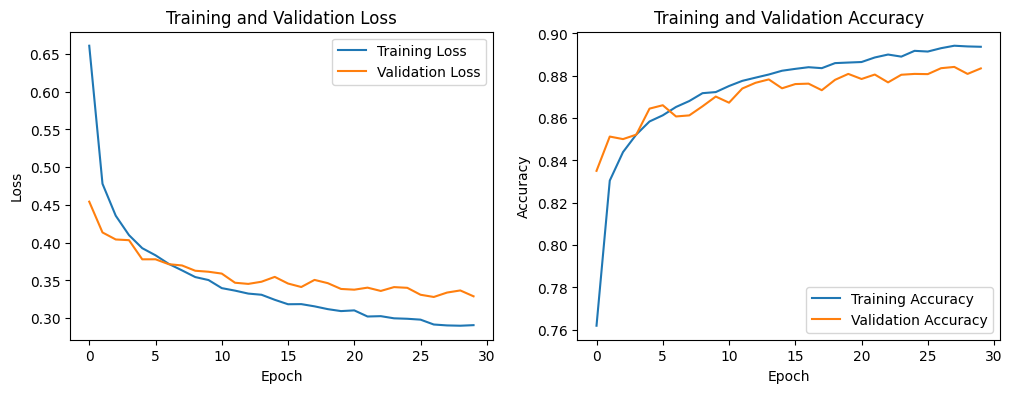

In [249]:
# Overfitting görüntüleme

# Eğitim ve doğrulama metrikleri
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [250]:
scores["Algorithm"].append("ANN")
scores["Accuracy"].append(acc)
scores["F1 Score"].append(f1_score)
scores["Recall"].append(recall)
scores["Precision"].append(precision)

scores

{'Algorithm': ['KNN', 'Random Forest', 'Decision Tree', 'SVC', 'ANN'],
 'Accuracy': [0.8554, 0.8756, 0.7939, 0.8828, 0.8937],
 'Precision': [0.8578, 0.8747, 0.7946, 0.8823, 0.9128],
 'Recall': [0.8554, 0.8756, 0.7939, 0.8828, 0.8762],
 'F1 Score': [0.8546, 0.8742, 0.7941, 0.8823, 0.8932]}

## 4. Model Performanslarının Karşılaştırılması

In [251]:
# Skorların tutulduğu dictionaryden bir DataFrame oluşturalım
# Bütün metrikler 0-1 arasında olduğundan normalizasyona gerek duymuyoruz.

df = pd.DataFrame(scores)

df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,KNN,0.8554,0.8578,0.8554,0.8546
1,Random Forest,0.8756,0.8747,0.8756,0.8742
2,Decision Tree,0.7939,0.7946,0.7939,0.7941
3,SVC,0.8828,0.8823,0.8828,0.8823
4,ANN,0.8937,0.9128,0.8762,0.8932


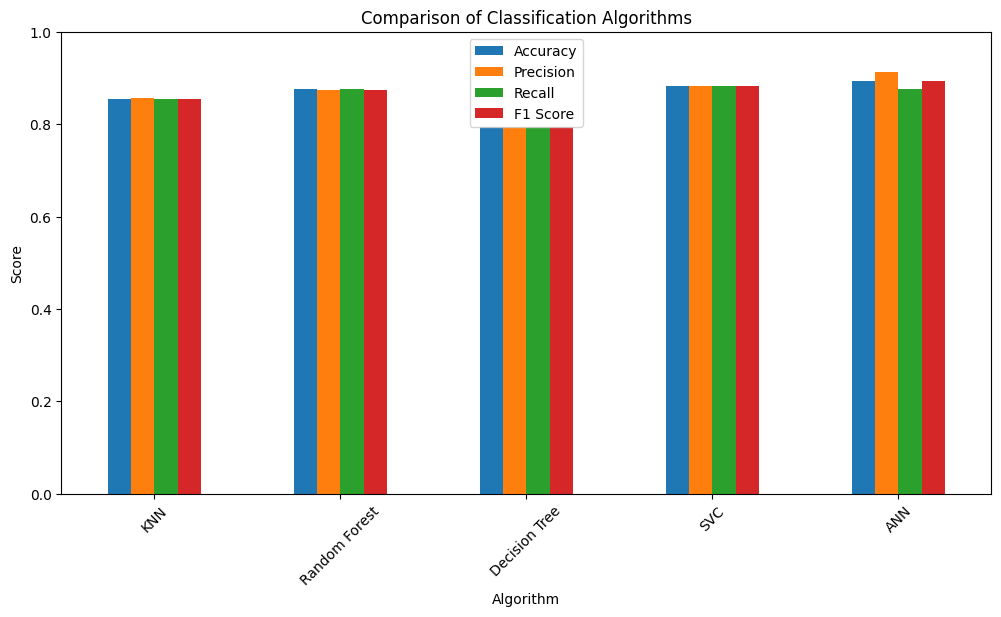

In [252]:
df.set_index('Algorithm', inplace=True)

# Değerleri karşılaştırmak için bar grafiği kullanalım

df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Classification Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Bütün değerler 0-1 arasında olduğundan alt ve üst sınırları bu şekilde belirleyelim.
plt.show()

In [253]:
# Bütün metrik değerleri bu proje kapsamında bizim için aynı oranda önemli, bu nedenle ortalamalarını alabiliriz.
df['Composite Score'] = df.mean(axis=1)

# Ortalama değerine göre sıralayalım
df_sorted = df.sort_values(by='Composite Score', ascending=False)

df_sorted

,Accuracy,Precision,Recall,F1 Score,Composite Score
Algorithm,,,,,
ANN,0.8937,0.9128,0.8762,0.8932,0.893975
SVC,0.8828,0.8823,0.8828,0.8823,0.882550
Random Forest,0.8756,0.8747,0.8756,0.8742,0.875025
KNN,0.8554,0.8578,0.8554,0.8546,0.855800
Decision Tree,0.7939,0.7946,0.7939,0.7941,0.794125
